### GEDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats
from datetime import datetime

In [2]:
df = pd.read_csv('/Volumes/MemoriaEle/HeavyData/incidentes-viales-c5.csv')

In [3]:
df.shape

(1383138, 18)

In [4]:
df.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

In [5]:
df = df.replace({'(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada':'A_afirmativo',
                          '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad': 'N_negativo',
                          '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente':'D_diferido',
                         '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente':'F_falsa',
                          '(I) El incidente reportado es afirmativo y se añade información adicional al evento': 'I_informativo'}) 

In [6]:
df.isnull().sum()

folio                  0
fecha_creacion         0
hora_creacion          0
dia_semana             0
codigo_cierre          0
fecha_cierre           0
año_cierre             0
mes_cierre             0
hora_cierre            0
delegacion_inicio    158
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre    140
geopoint             446
mes                    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

folio                0
fecha_creacion       0
hora_creacion        0
dia_semana           0
codigo_cierre        0
fecha_cierre         0
año_cierre           0
mes_cierre           0
hora_cierre          0
delegacion_inicio    0
incidente_c4         0
latitud              0
longitud             0
clas_con_f_alarma    0
tipo_entrada         0
delegacion_cierre    0
geopoint             0
mes                  0
dtype: int64

In [9]:
df.shape

(1382534, 18)

In [10]:
df = df[df['longitud'] > -99.35]

In [11]:
df.shape

(1382502, 18)

In [12]:
df = df[df['latitud'] < 20]

In [13]:
df.shape

(1382502, 18)

# graficos temporales
### 1

In [14]:
fechas_inicio = df.fecha_creacion.str.split("/", n=2,expand=True)
fechas_inicio

,0,1,2
0,23,01,2016
1,23,01,2016
2,24,01,2016
3,24,01,2016
4,24,01,2016
...,...,...,...
1383133,22,10,2020
1383134,22,10,2020
1383135,22,10,2020
1383136,22,10,2020


In [15]:
df['dia_inicio']=fechas_inicio[0]
df['mes_inicio']=fechas_inicio[1]
df['anio_inicio']=fechas_inicio[2]

In [16]:
df.shape

(1382502, 21)

In [17]:
df['anio_inicio'] = df['anio_inicio'].replace(['19'],'2019')
df['anio_inicio'] = df['anio_inicio'].replace(['18'],'2018')

In [18]:
fecha_separated = df.groupby(['anio_inicio','mes_inicio']).size().reset_index(name="counts")
fecha_separated

,anio_inicio,mes_inicio,counts
0,2013,12,25
1,2014,01,12264
2,2014,02,12781
3,2014,03,14711
4,2014,04,12567
...,...,...,...
78,2020,06,10394
79,2020,07,12416
80,2020,08,13608
81,2020,09,13234


In [19]:
fecha_separated=fecha_separated.drop(0)

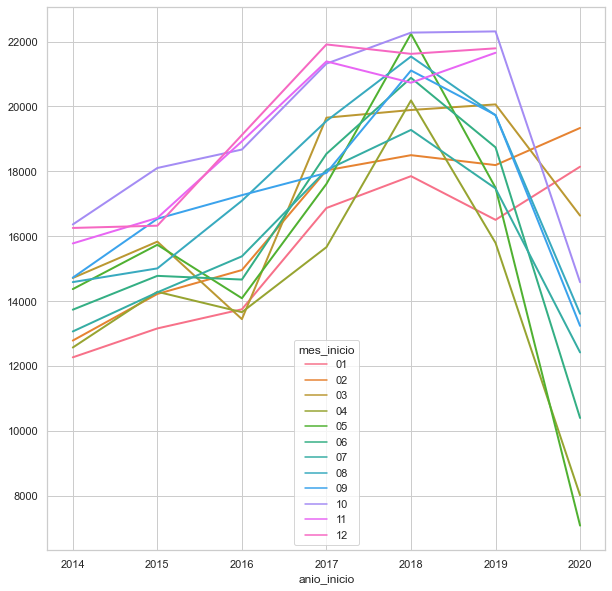

In [21]:
fecha_separated_p = fecha_separated.pivot( "anio_inicio","mes_inicio","counts")
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h=sns.lineplot(data=fecha_separated_p,linewidth = 2,dashes=False)

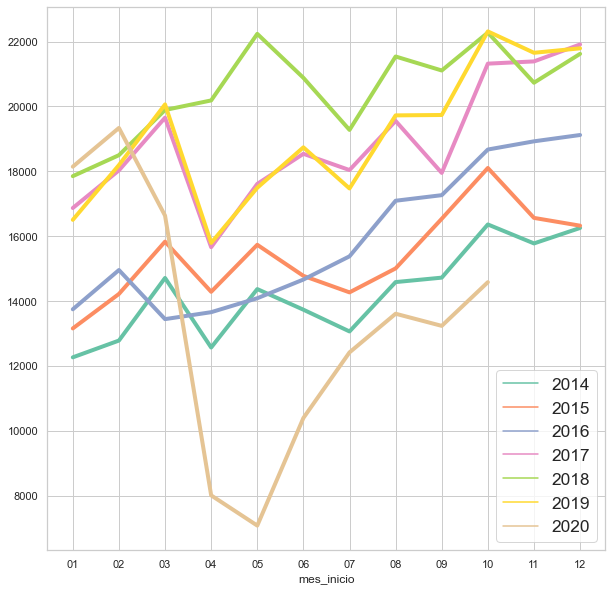

In [23]:
fecha_separated_p = fecha_separated.pivot("mes_inicio", "anio_inicio","counts")
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=fecha_separated_p,linewidth = 4,dashes=False)
plt.legend(fontsize='x-large', title_fontsize='40',loc='lower right')
plt.show()

# heatmaps 

In [24]:
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])

In [25]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,A_afirmativo,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,...,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,23,01,2016
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,A_afirmativo,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,...,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,23,01,2016
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,A_afirmativo,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,...,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,24,01,2016


In [26]:
conteos_fechas = df.groupby(['fecha_creacion']).size().reset_index(name='counts')
conteos_fechas = conteos_fechas.drop(0)
conteos_fechas

,fecha_creacion,counts
1,2014-01-01,231
2,2014-01-02,484
3,2014-01-03,456
4,2014-01-04,510
5,2014-01-05,368
...,...,...
2492,2020-12-06,399
2493,2020-12-07,447
2494,2020-12-08,361
2495,2020-12-09,527


In [27]:
conteos_fechas = conteos_fechas.set_index('fecha_creacion')
conteos_fechas

,counts
fecha_creacion,
2014-01-01,231
2014-01-02,484
2014-01-03,456
2014-01-04,510
2014-01-05,368
...,...
2020-12-06,399
2020-12-07,447
2020-12-08,361


In [28]:
conteos_fechas.insert(1, 'year', conteos_fechas.index.year)
conteos_fechas.insert(2, 'month', conteos_fechas.index.month)
conteos_fechas.insert(3, 'day', conteos_fechas.index.day)
conteos_fechas = conteos_fechas.copy()

In [29]:
conteos_fechas

,counts,year,month,day
fecha_creacion,,,,
2014-01-01,231,2014,1,1
2014-01-02,484,2014,1,2
2014-01-03,456,2014,1,3
2014-01-04,510,2014,1,4
2014-01-05,368,2014,1,5
...,...,...,...,...
2020-12-06,399,2020,12,6
2020-12-07,447,2020,12,7
2020-12-08,361,2020,12,8


In [30]:
yyyy = conteos_fechas['year'].unique()
month = conteos_fechas['month'].unique()

In [31]:
yyyy

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [32]:
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [33]:
def heatmaps(data,choose_year,axis):
    data1 = data.loc[data['year'] == choose_year]
    data1 = data1.pivot_table(index="day",columns="month",values='counts')
    heat = sns.heatmap(data1, cbar=False, ax=axis,cmap="RdBu")
    return heat

<AxesSubplot:xlabel='month', ylabel='day'>

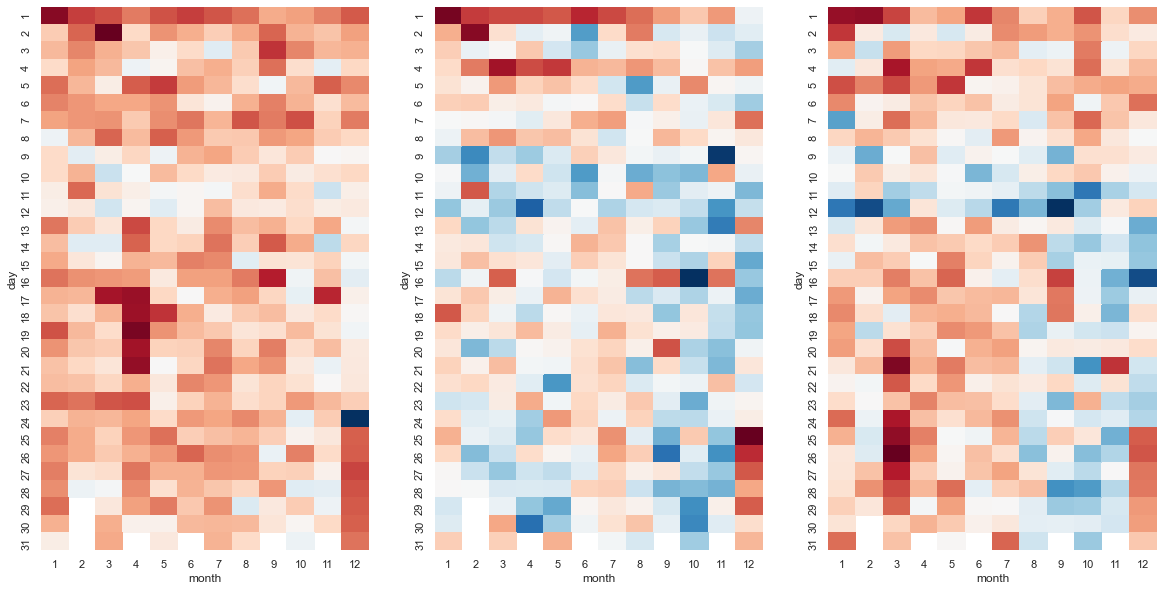

In [34]:
fig, axs = plt.subplots(figsize=(20,10),ncols=3)
heatmaps(conteos_fechas,2014,axs[0])
heatmaps(conteos_fechas,2015,axs[1])
heatmaps(conteos_fechas,2016,axs[2])

<AxesSubplot:xlabel='month', ylabel='day'>

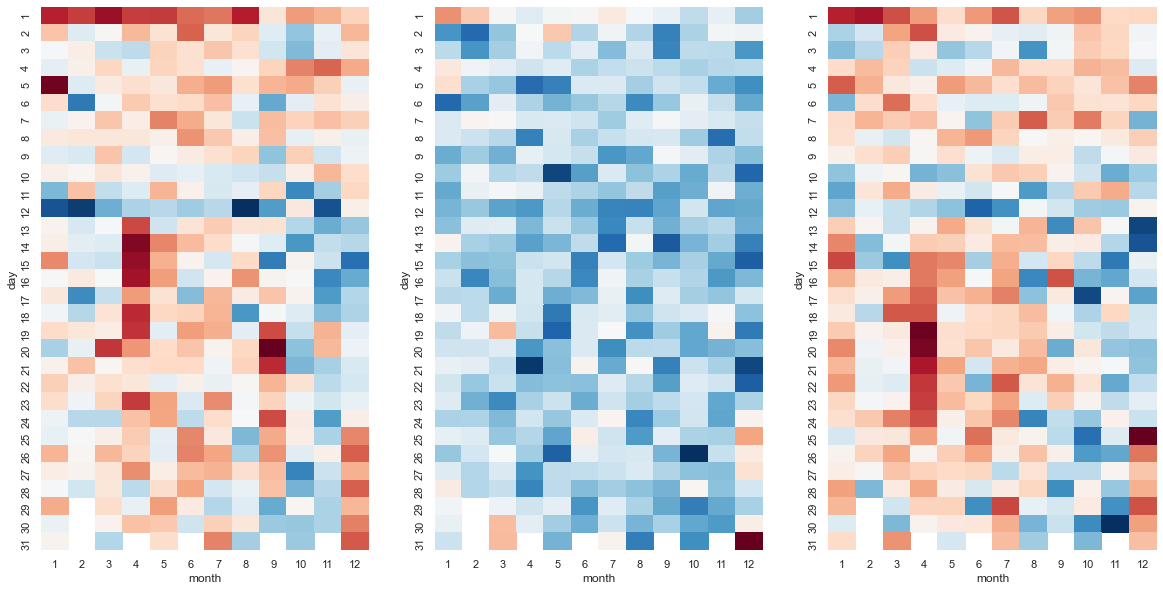

In [35]:
fig, axs = plt.subplots(figsize=(20,10),ncols=3)
heatmaps(conteos_fechas,2017,axs[0])
heatmaps(conteos_fechas,2018,axs[1])
heatmaps(conteos_fechas,2019,axs[2])


<AxesSubplot:xlabel='month', ylabel='day'>

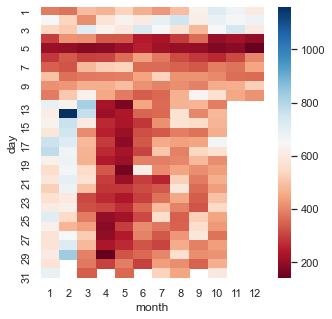

In [36]:
def heatmaps(data,choose_year):
    data1 = data.loc[data['year'] == choose_year]
    data1 = data1.pivot_table(index="day",columns="month",values='counts')
    heat = sns.heatmap(data1,cmap="RdBu")
    return heat
fig, axs = plt.subplots(figsize=(5,5))
heatmaps(conteos_fechas,2020)

# otro grafico

In [37]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,A_afirmativo,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,...,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,23,01,2016
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,A_afirmativo,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,...,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,23,01,2016
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,A_afirmativo,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,...,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,24,01,2016


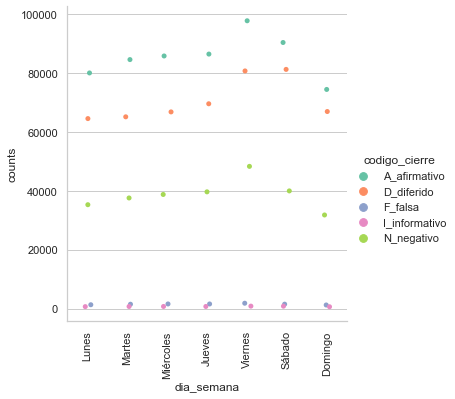

In [38]:
dia_cierre = df.groupby(['dia_semana','codigo_cierre']).size().reset_index(name="counts")
j=sns.catplot(x='dia_semana',y='counts', hue='codigo_cierre',data=dia_cierre, 
            order=(["Lunes", "Martes", "Miércoles","Jueves","Viernes","Sábado","Domingo"]))
plt.xticks(rotation= 90)
plt.show()

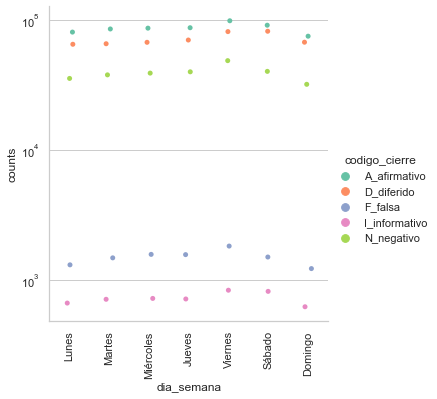

In [39]:
dia_cierre = df.groupby(['dia_semana','codigo_cierre']).size().reset_index(name="counts")
g = sns.catplot(x='dia_semana',y='counts', hue='codigo_cierre',data=dia_cierre,
                order=(["Lunes", "Martes", "Miércoles","Jueves","Viernes","Sábado","Domingo"]))
plt.yscale('log')
plt.xticks(rotation= 90)
plt.show()

# localización

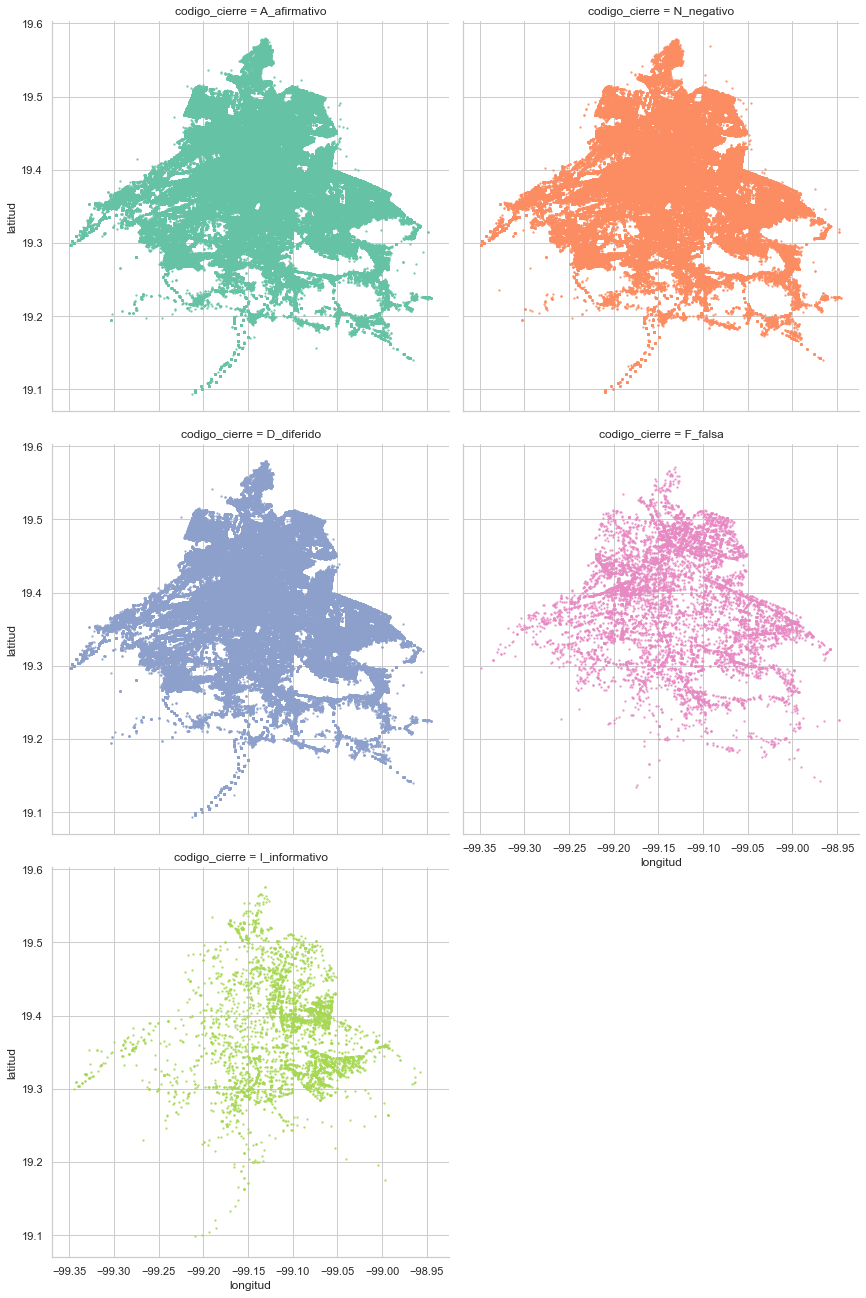

In [40]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='codigo_cierre',fit_reg=False,
            col='codigo_cierre',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

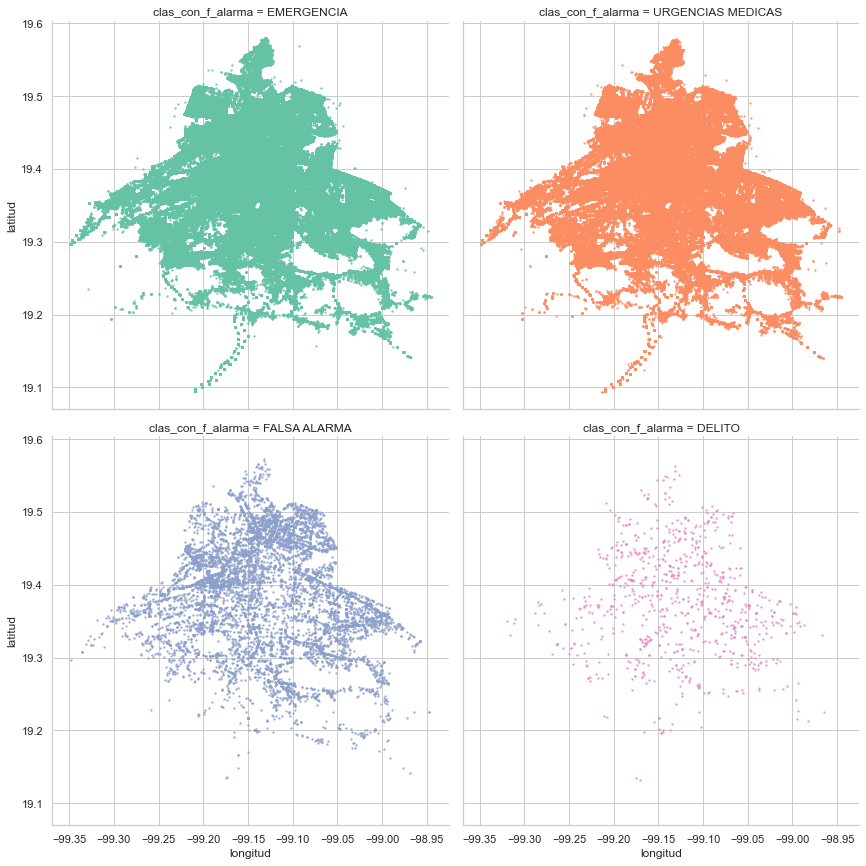

In [41]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='clas_con_f_alarma',fit_reg=False,
            col='clas_con_f_alarma',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

In [56]:
hola=df.groupby(["codigo_cierre","incidente_c4"]).size().reset_index(name="counts")
hola=hola.pivot("incidente_c4","codigo_cierre","counts")
hola=hola.fillna(0)
hola.sort_values('F_falsa',ascending=False)

codigo_cierre,A_afirmativo,D_diferido,F_falsa,I_informativo,N_negativo
incidente_c4,,,,,
accidente-choque sin lesionados,341656.0,216404.0,7623.0,3599.0,190956.0
accidente-choque con lesionados,127973.0,142522.0,1602.0,751.0,42026.0
lesionado-atropellado,82890.0,84895.0,808.0,580.0,24263.0
accidente-motociclista,21579.0,26245.0,213.0,25.0,7530.0
accidente-volcadura,12102.0,16678.0,94.0,96.0,2770.0
accidente-persona atrapada / desbarrancada,3094.0,1306.0,38.0,7.0,1157.0
lesionado-accidente automovilístico,3297.0,1854.0,34.0,19.0,849.0
accidente-otros,1613.0,386.0,24.0,4.0,437.0
accidente-ciclista,1202.0,1029.0,11.0,0.0,476.0


# falsas alarmas

In [71]:
falso = df.loc[df['codigo_cierre'] == 'F_falsa']
falso.shape
falso.tail()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
1380054,C5/201029/04217,2020-10-29,18:23:13,Jueves,F_falsa,29/10/2020,2020,Octubre,22:38:07,VENUSTIANO CARRANZA,...,19.41876,-99.08613,FALSA ALARMA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.41876,-99.08613",10,29,10,2020
1381529,C5/201025/06679,2020-10-25,18:39:19,Domingo,F_falsa,25/10/2020,2020,Octubre,19:51:57,IZTAPALAPA,...,19.35943,-99.03176,FALSA ALARMA,LLAMADA DEL 911,IZTAPALAPA,"19.35943002,-99.03175992",10,25,10,2020
1381606,C5/201025/01233,2020-10-25,00:48:47,Domingo,F_falsa,25/10/2020,2020,Octubre,00:54:50,IZTACALCO,...,19.39672,-99.09879,FALSA ALARMA,LLAMADA DEL 911,IZTACALCO,"19.39671999,-99.09879012",10,25,10,2020
1382013,C5/201028/04341,2020-10-28,18:57:06,Miércoles,F_falsa,28/10/2020,2020,Octubre,20:19:41,MIGUEL HIDALGO,...,19.44608,-99.18711,FALSA ALARMA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.44608004,-99.18711",10,28,10,2020
1382362,C5/201031/05170,2020-10-31,16:02:02,Sábado,F_falsa,31/10/2020,2020,Octubre,16:30:52,CUAUHTEMOC,...,19.42744,-99.15074,FALSA ALARMA,LLAMADA DEL 911,CUAUHTEMOC,"19.42743996,-99.15073992",10,31,10,2020


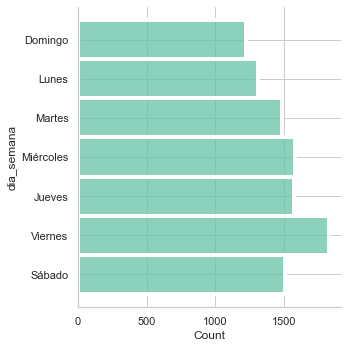

In [75]:
sns.displot(falso,y='dia_semana',)

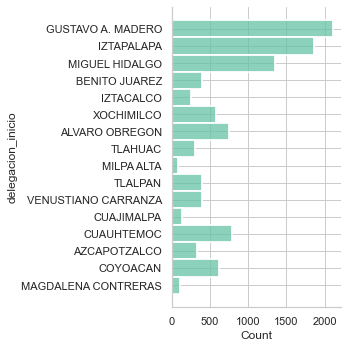

In [84]:
sns.displot(falso,y='delegacion_inicio')

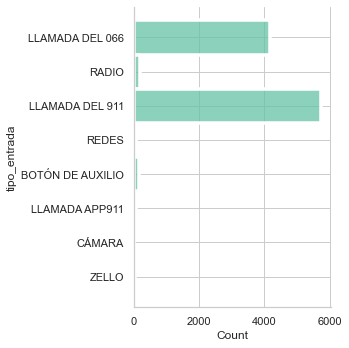

In [86]:
sns.displot(falso,y='tipo_entrada')

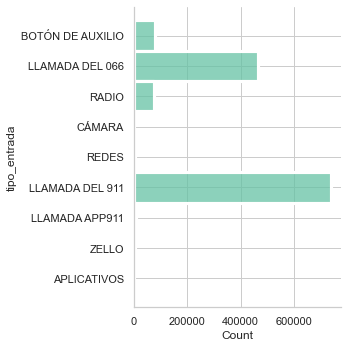

In [88]:
sns.displot(df,y='tipo_entrada')

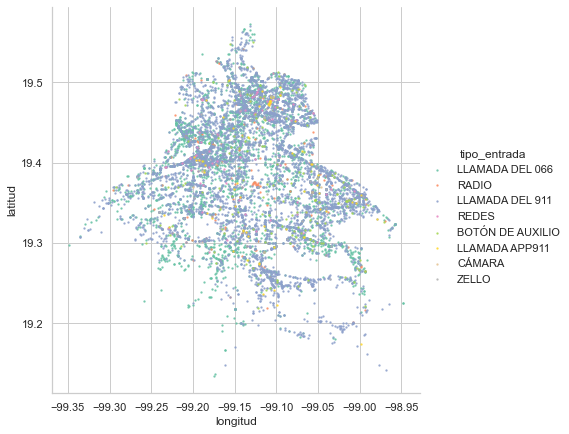

In [83]:
sns.lmplot(x='longitud',y='latitud',data=falso,fit_reg=False,hue='tipo_entrada',
           height=6,scatter_kws={"s":2,"alpha":0.7})